## Abstract Hamiltonian terms

In [1]:
from micromagneticmodel.hamiltonian import Hamiltonian, Exchange, Zeeman, Demag, UniaxialAnisotropy

In [2]:
hamiltonian = Hamiltonian()
hamiltonian

In [3]:
exchange = Exchange(8.78e-12)
exchange

Exchange(A=8.78e-12)

In [4]:
hamiltonian.add(exchange)
hamiltonian

Exchange(A=8.78e-12)

In [5]:
zeeman = Zeeman((1e6, 1e6, 1e6))
zeeman

Zeeman(H=(1000000.0, 1000000.0, 1000000.0))

In [6]:
hamiltonian.add(zeeman)
hamiltonian

Exchange(A=8.78e-12) + Zeeman(H=(1000000.0, 1000000.0, 1000000.0))

In [7]:
anisotropy = UniaxialAnisotropy(1e3, (0, 0, 1))
anisotropy

UniaxialAnisotropy(K=1000.0, u=(0, 0, 1))

In [8]:
hamiltonian.add(anisotropy)
hamiltonian

Exchange(A=8.78e-12) + Zeeman(H=(1000000.0, 1000000.0, 1000000.0)) + UniaxialAnisotropy(K=1000.0, u=(0, 0, 1))

In [9]:
demag = Demag()
demag

Demag()

In [10]:
hamiltonian.add(demag)
hamiltonian

Exchange(A=8.78e-12) + Zeeman(H=(1000000.0, 1000000.0, 1000000.0)) + UniaxialAnisotropy(K=1000.0, u=(0, 0, 1)) + Demag()

### Adding energy terms

In [12]:
hamiltonian2 = exchange + anisotropy + demag + zeeman
hamiltonian2

Exchange(A=8.78e-12) + UniaxialAnisotropy(K=1000.0, u=(0, 0, 1)) + Demag() + Zeeman(H=(1000000.0, 1000000.0, 1000000.0))

## Dynamics

In [14]:
from micromagneticmodel.dynamics import Dynamics, Precession, Damping

In [15]:
gamma = 2.21e5
precession = Precession(gamma)
precession

Precession(gamma=221000.0)

In [16]:
alpha = 0.1
damping = Damping(alpha)
damping

Damping(alpha=0.1)

In [17]:
dynamics = precession + damping
dynamics

Precession(gamma=221000.0) + Damping(alpha=0.1)

## Mesh

In [18]:
from micromagneticmodel.mesh import Mesh

In [19]:
cmin = (0, 0, 0)
cmax = (100, 100, 100)
d = (10, 10, 25)

mesh = Mesh(cmin, cmax, d)

<IPython.core.display.Javascript object>


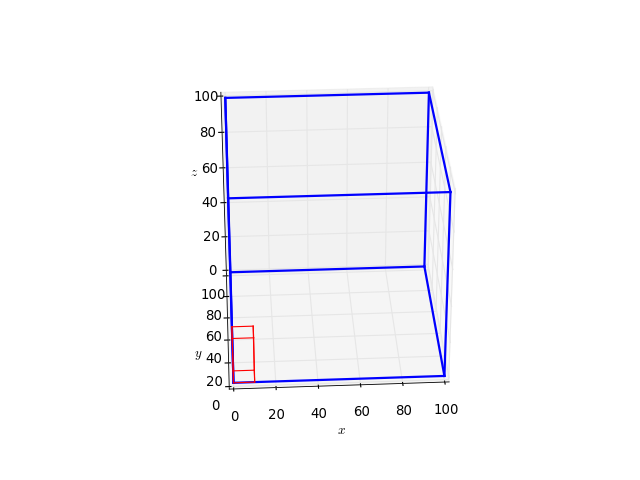

In [20]:
mesh

## Abstract micormagnetic Model

In [21]:
from micromagneticmodel.sim import Sim

In [22]:
cmin = (0, 0, 0)
cmax = (100, 100, 100)
d = (10, 10, 10)

mesh = Mesh(cmin, cmax, d)

In [23]:
Ms = 8.6e5

sim = Sim(mesh, Ms, name='mumag_model')

In [24]:
A = 8.78e-12
D = 1.58e-3
K = 1.5e3
u = (0, 0, 1)
H = (0.5*Ms, 0, 0)

sim.hamiltonian = Exchange(A) + UniaxialAnisotropy(K, u) + Zeeman(H) + Demag()

In [25]:
gamma = 2.21e5
alpha = 0.1

sim.dynamics = Precession(gamma) + Damping(alpha)

<IPython.core.display.Javascript object>


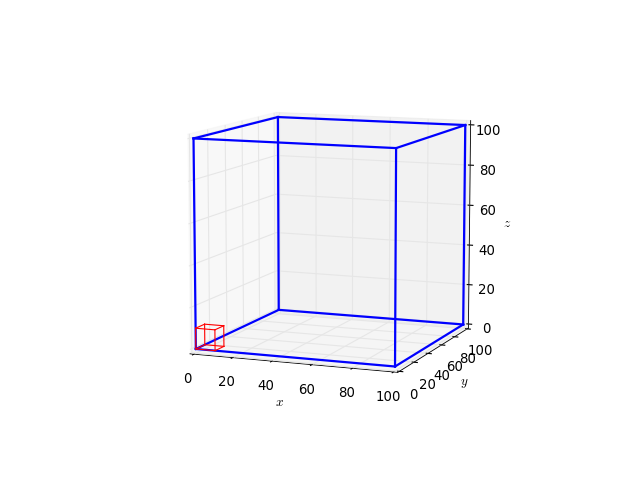

In [26]:
sim.mesh

In [27]:
sim.hamiltonian

Exchange(A=8.78e-12) + UniaxialAnisotropy(K=1500.0, u=(0, 0, 1)) + Zeeman(H=(430000.0, 0, 0)) + Demag()

In [29]:
sim.dynamics

Precession(gamma=221000.0) + Damping(alpha=0.1)

In [ ]:
sim.relax()